## MED - Analiza Eksploracyjna 
## Bike Sharing
Autor: Karol Kociołek

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Opis danych

- instant: index
- dteday : data
- season : pora roku (1:zima, 2:wiosna, 3:lato, 4:jesien)
- yr : year (0: 2011, 1:2012)
- mnth : miesiac ( 1 do 12)
- hr : godzina (0 do 23)
- holiday : czy święto
- weekday : dzień tygodnia
- workingday : czy dzień woly od pracy
- weathersit : waruki pogodowe w skali od 1 do 4
- temp : znormalizowana temperatura
- atemp: znormalizowana odczuwalna temperatura
- hum: znormalizowana wilgotność
- windspeed: znormalizowana prędkość wiatru
- casual: liczba niezarejestrowanych użytkowników
- registered: liczba zarejstrowanych użytkowników
- cnt: liczba wypożyczeń

## Wczytanie danych

In [236]:
data_hour=pd.read_csv('MED/hour.csv')
data_day=pd.read_csv('MED/day.csv')
data=data_hour

In [237]:
data.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Jedynie typ danych dteday jest nie poprawny.

In [239]:
data['dteday']= pd.to_datetime(data['dteday'])


In [240]:
data.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

Columna instant jest  nie potrzebna.  

In [241]:
data = data.drop('instant',axis=1)

In [242]:
columns=data.columns.unique()
columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [243]:
columns=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']
#wartości  dteday nie są potrzebne do analiz

In [244]:
data.isnull().values.any()

False

Dane są kompletne, nie posiadają pustych pól

## Zależność między danymi

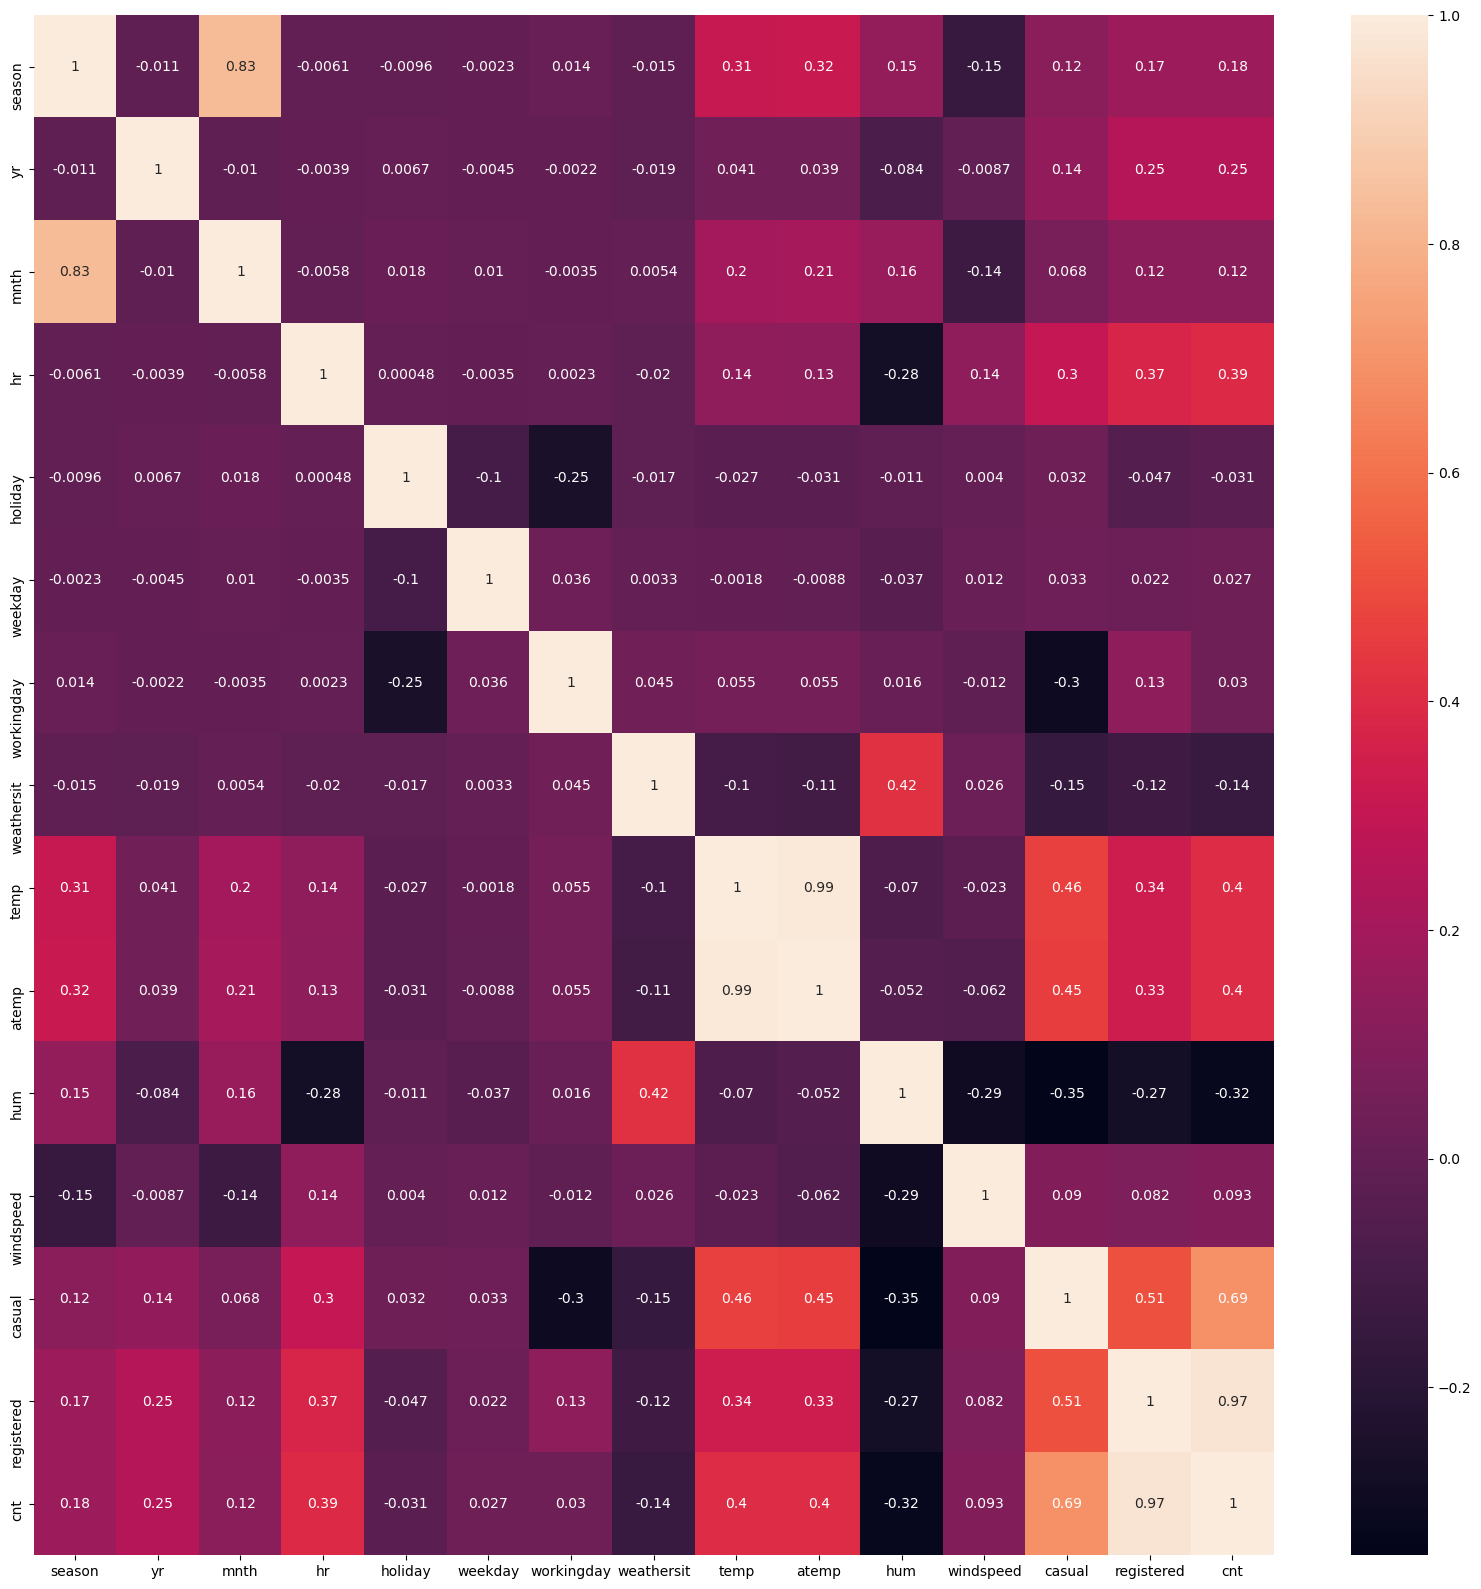

In [245]:
plt.figure(figsize=(20,20))
sns.heatmap(data[columns].corr(),annot = True)
plt.show()

In [246]:
data[columns].corr()[data[columns].corr() > 0.8].fillna(False)

season     yr      mnth     hr holiday weekday workingday  \
season           1.0  False  0.830386  False   False   False      False   
yr             False    1.0     False  False   False   False      False   
mnth        0.830386  False       1.0  False   False   False      False   
hr             False  False     False    1.0   False   False      False   
holiday        False  False     False  False     1.0   False      False   
weekday        False  False     False  False   False     1.0      False   
workingday     False  False     False  False   False   False        1.0   
weathersit     False  False     False  False   False   False      False   
temp           False  False     False  False   False   False      False   
atemp          False  False     False  False   False   False      False   
hum            False  False     False  False   False   False      False   
windspeed      False  False     False  False   False   False      False   
casual         False  False     False  False   False   False      False   
registered     False  False     False  False   False   False      False   
cnt            False  False     False  False   False   False      False   

           weathersit      temp     atemp    hum windspeed casual registered  \
season          False     False     False  False     False  False      False   
yr              False     False     False  False     False  False      False   
mnth            False     False     False  False     False  False      False   
hr              False     False     False  False     False  False      False   
holiday         False     False     False  False     False  False      False   
weekday         False     False     False  False     False  False      False   
workingday      False     False     False  False     False  False      False   
weathersit        1.0     False     False  False     False  False      False   
temp            False       1.0  0.987672  False     False  False      False   
atemp           False  0.987672       1.0  False     False  False      False   
hum             False     False     False    1.0     False  False      False   
windspeed       False     False     False  False       1.0  False      False   
casual          False     False     False  False     False    1.0      False   
registered      False     False     False  False     False  False        1.0   
cnt             False     False     False  False     False  False   0.972151   

                 cnt  
season         False  
yr             False  
mnth           False  
hr             False  
holiday        False  
weekday        False  
workingday     False  
weathersit     False  
temp           False  
atemp          False  
hum            False  
windspeed      False  
casual         False  
registered  0.972151  
cnt              1.0

Dane nie są ze sobą skolerowane, jedynie kolumny cnt i registred są skolerowane, co sugeruje że te głównymi użytkownikami są zarejestrowani użytkownicy. Również skolerowane są kolumny temperatura oraz odczuwalna temperatura. Dlatego można, usunać kolumne temp lub atemp.

In [247]:
data.drop(columns=['temp'])

dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0     2011-01-01       1   0     1   0        0        6           0   
1     2011-01-01       1   0     1   1        0        6           0   
2     2011-01-01       1   0     1   2        0        6           0   
3     2011-01-01       1   0     1   3        0        6           0   
4     2011-01-01       1   0     1   4        0        6           0   
...          ...     ...  ..   ...  ..      ...      ...         ...   
17374 2012-12-31       1   1    12  19        0        1           1   
17375 2012-12-31       1   1    12  20        0        1           1   
17376 2012-12-31       1   1    12  21        0        1           1   
17377 2012-12-31       1   1    12  22        0        1           1   
17378 2012-12-31       1   1    12  23        0        1           1   

       weathersit   atemp   hum  windspeed  casual  registered  cnt  
0               1  0.2879  0.81     0.0000       3          13   16  
1               1  0.2727  0.80     0.0000       8          32   40  
2               1  0.2727  0.80     0.0000       5          27   32  
3               1  0.2879  0.75     0.0000       3          10   13  
4               1  0.2879  0.75     0.0000       0           1    1  
...           ...     ...   ...        ...     ...         ...  ...  
17374           2  0.2576  0.60     0.1642      11         108  119  
17375           2  0.2576  0.60     0.1642       8          81   89  
17376           1  0.2576  0.60     0.1642       7          83   90  
17377           1  0.2727  0.56     0.1343      13          48   61  
17378           1  0.2727  0.65     0.1343      12          37   49  

[17379 rows x 15 columns]

In [248]:
data[columns].skew()

season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       5.638538
weekday      -0.002998
workingday   -0.785258
weathersit    1.228047
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.574905
casual        2.499237
registered    1.557904
cnt           1.277412
dtype: float64

Dane nie wymagają normalizacji

## Wizualizacja

<Figure size 2000x2000 with 0 Axes>

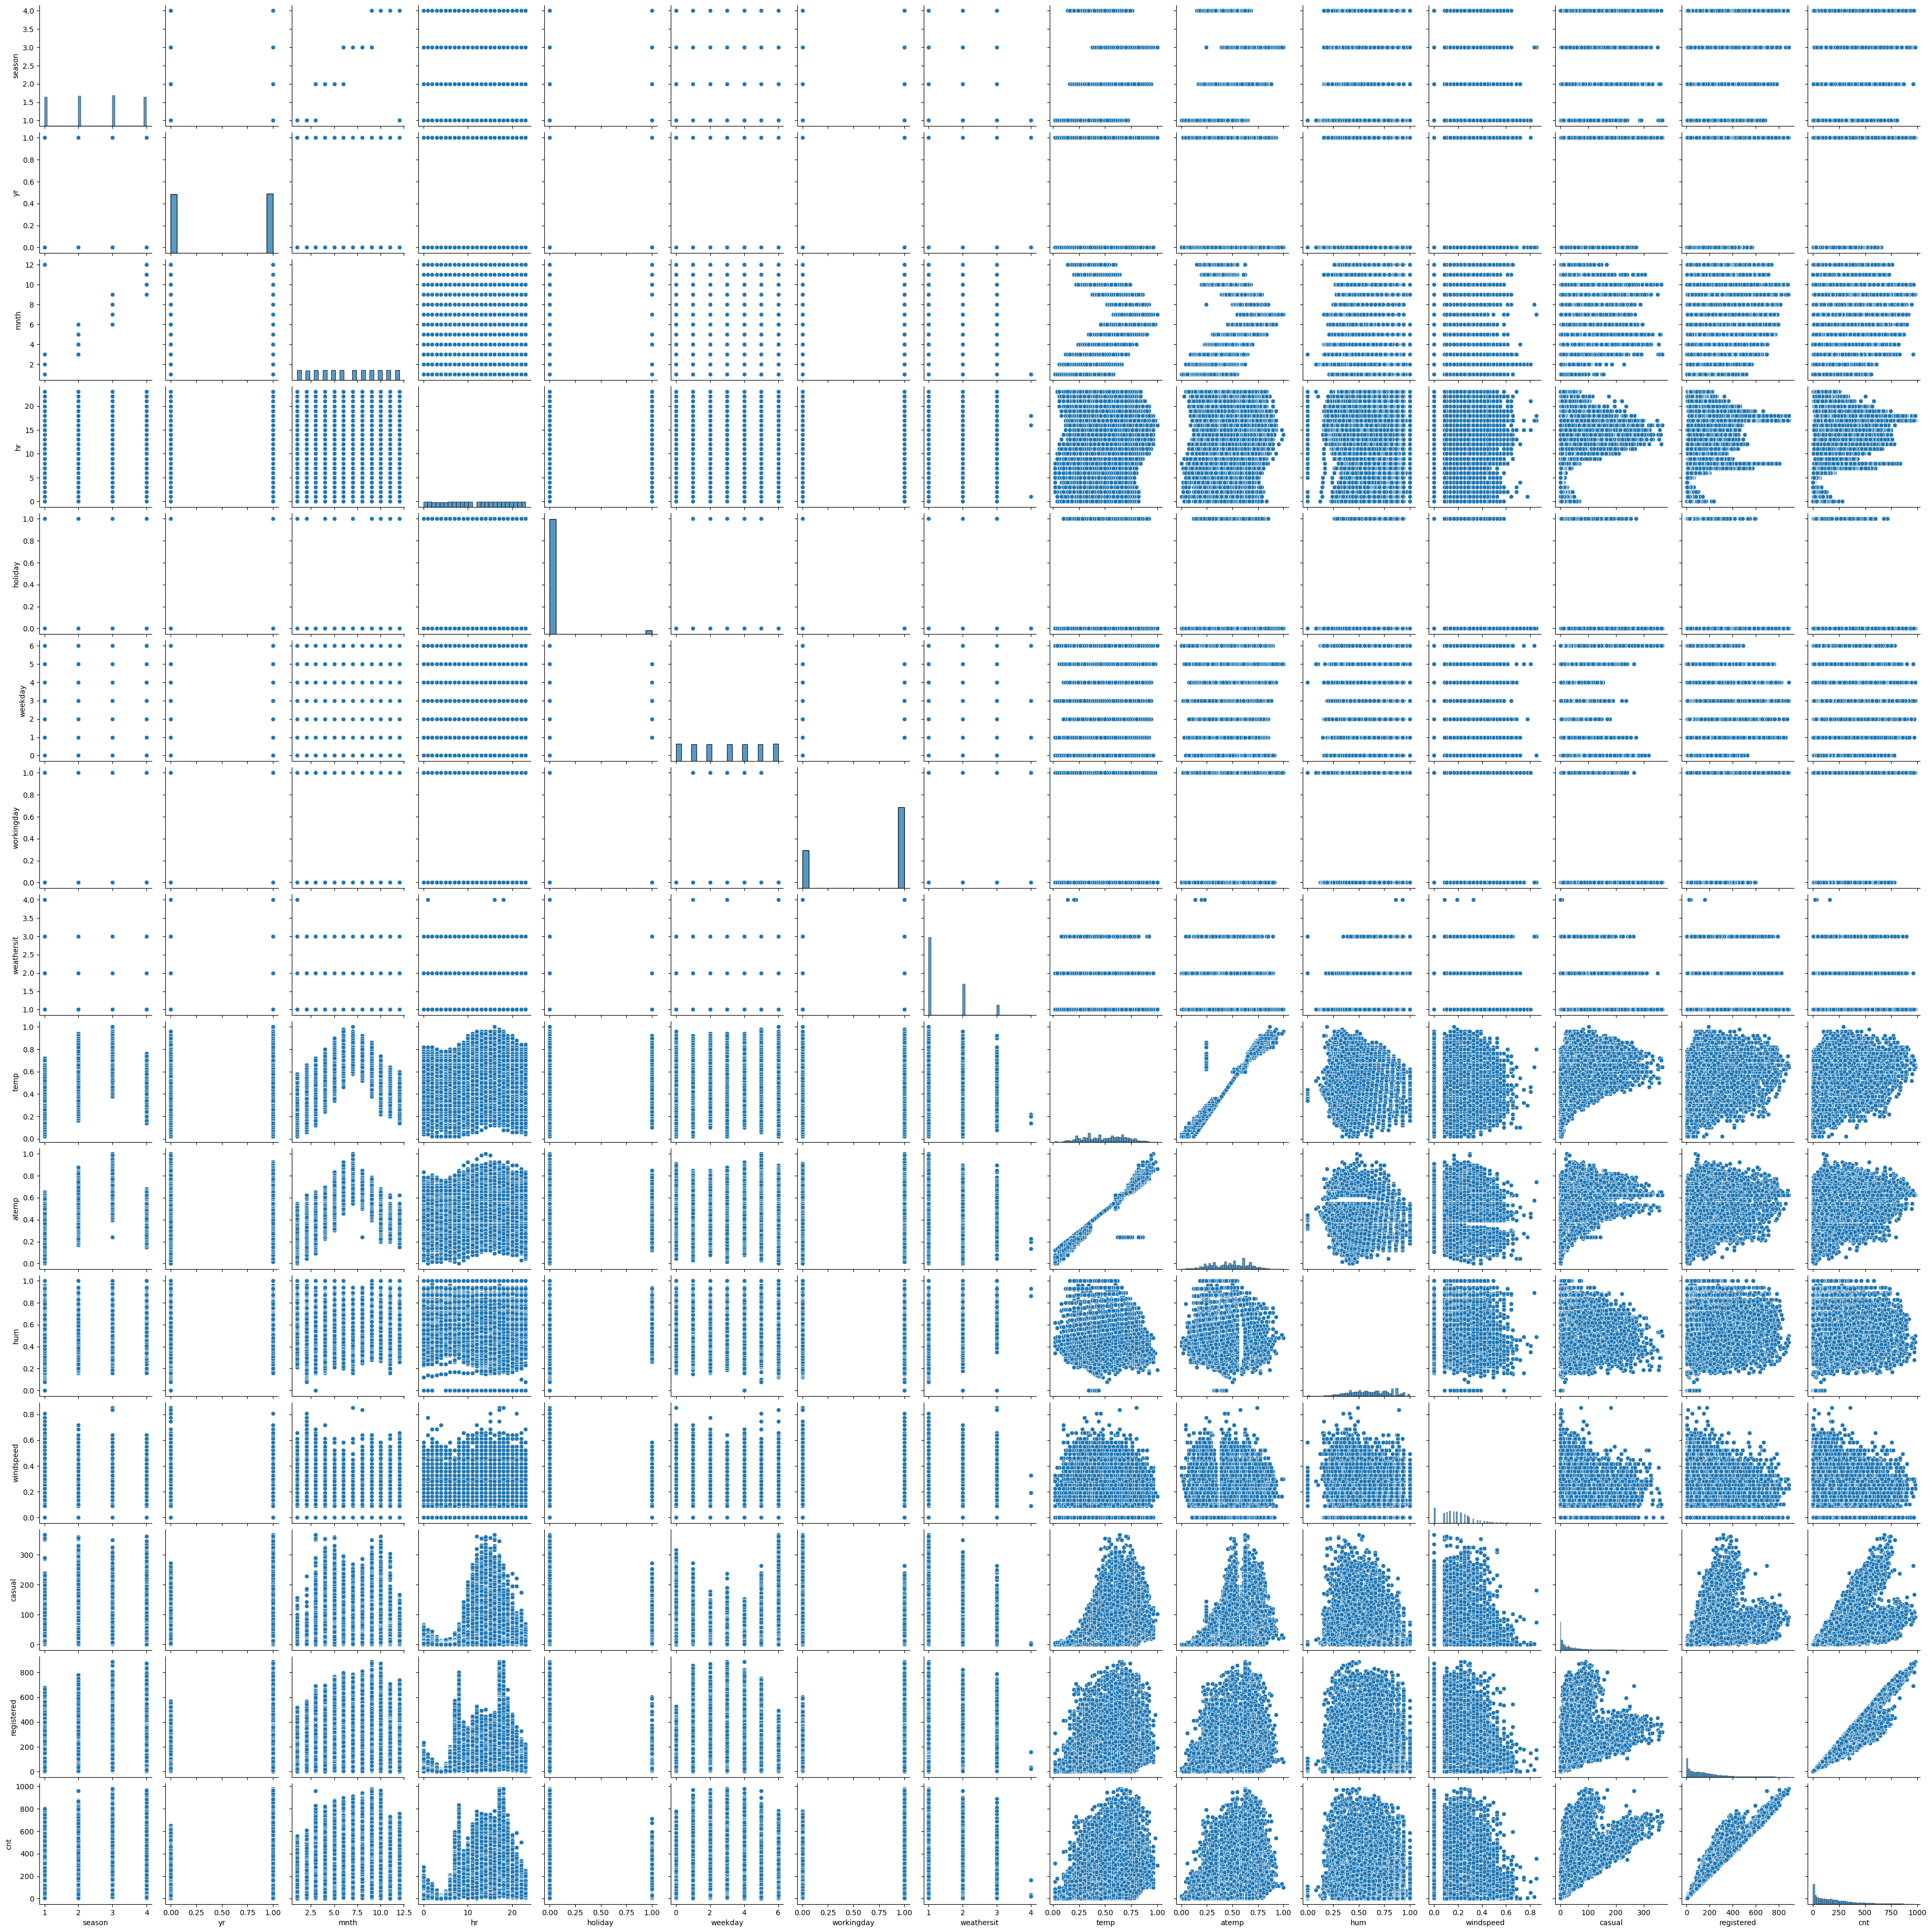

In [249]:
plt.figure(figsize=(20,20))
sns.pairplot(data[columns])
plt.show()

In [250]:
def vis(columns):
    j=1
    plt.figure(figsize=(20,40), dpi= 80)
    for i in columns:
        plt.subplot(5,4,j)
        sns.boxplot(data=data[i])
        plt.title(i)
        j=j+1
        
vis(columns)

In [251]:
sns.boxplot(data=data[[
 'casual',
 'registered',
 'cnt']])
fig=plt.gcf()
fig.set_size_inches(10,10)

In [252]:
def count_plot(columns):
    j=1
    plt.figure(figsize=(20,10))
    for col in columns:
        plt.subplot(2,2,j)
        sns.countplot(x=col, data= data)
        j=j+1
    
count_plot(['season', 'holiday', 'workingday', 'weathersit'])

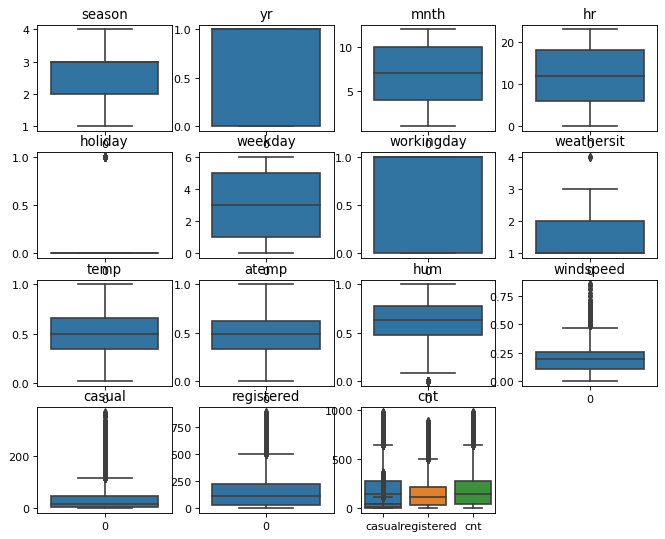

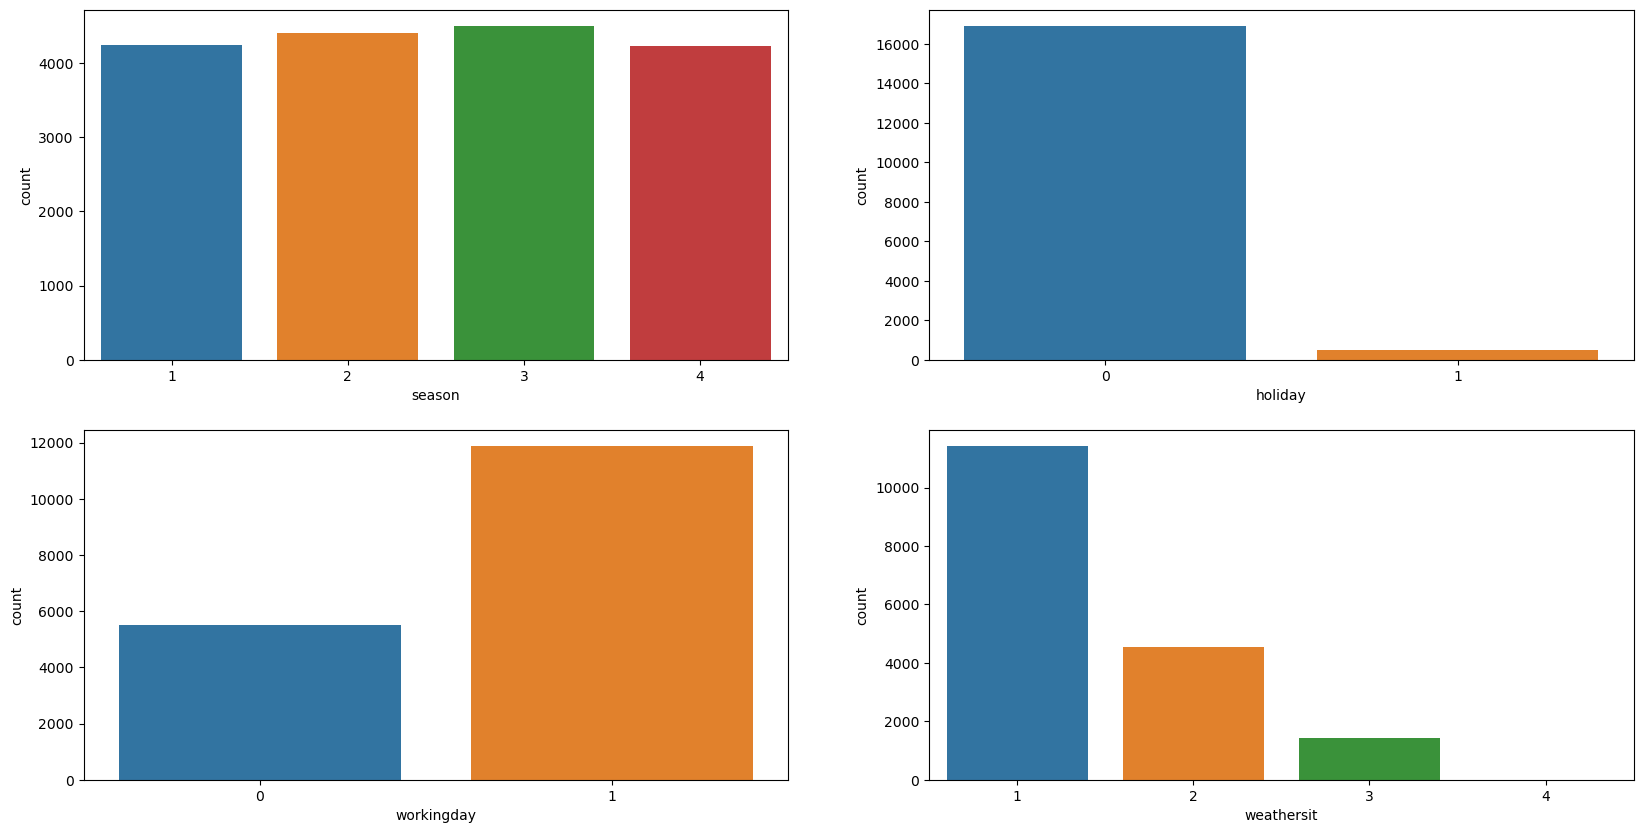

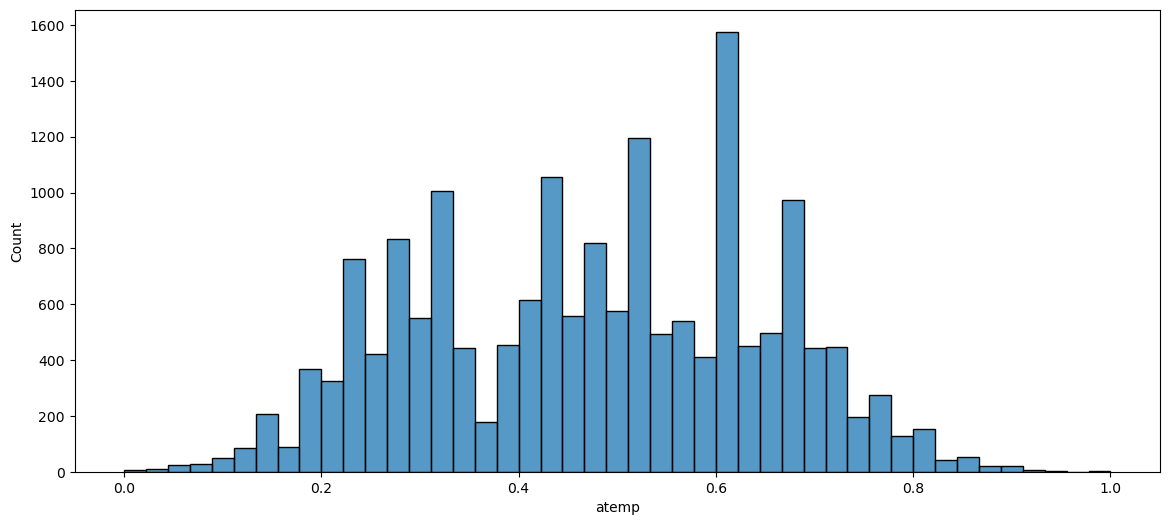

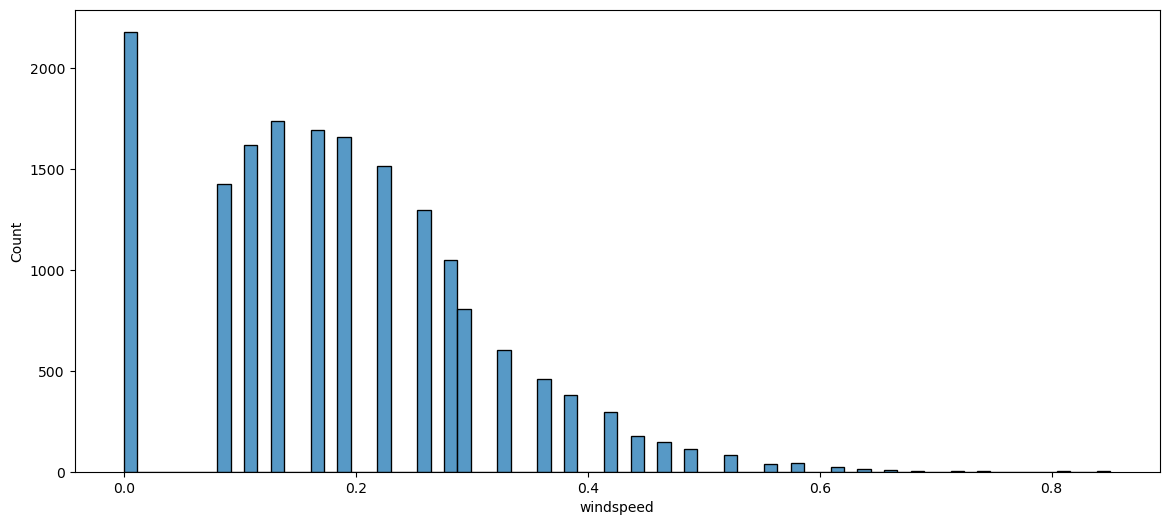

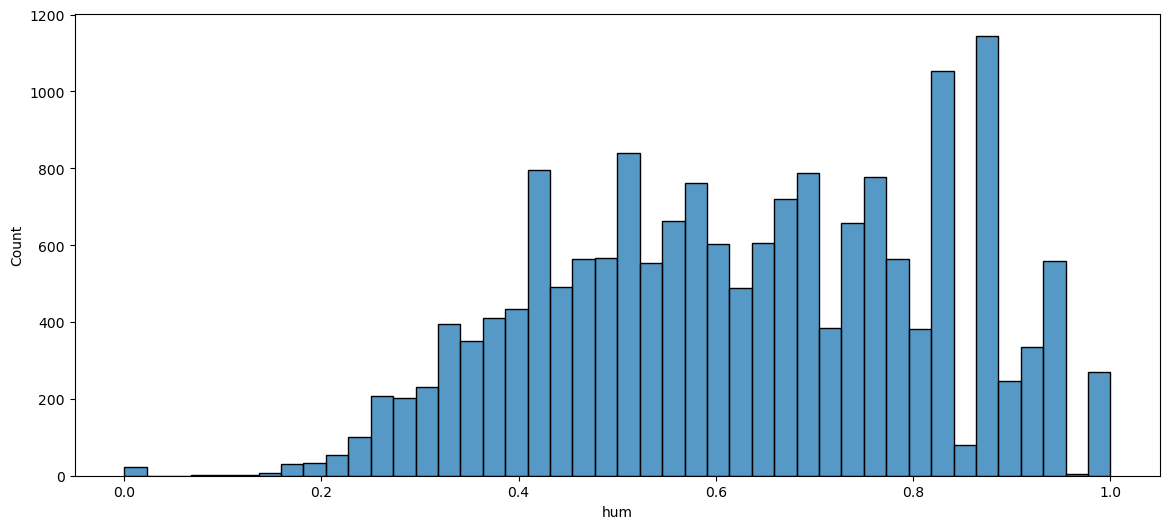

In [253]:
def hist_plot(columns):
    for col in columns:
        plt.figure(figsize=(14,6))
        sns.histplot(data[col])
        plt.show()
hist_plot(['atemp','windspeed', 'hum'])

Dominującą wartością jesli chodzi o wiatr jest jego brak

In [254]:
def count_plot2(columns,counts):
    j=1
    plt.figure(figsize=(20,100))
    for col in columns:
        for count in counts:
            plt.subplot(12,3,j)
            sns.boxplot(x=col,y=count, data=data)
            j=j+1


count_plot2(['season','yr','mnth','holiday','weekday','workingday','weathersit'],['casual', 'registered', 'cnt'])

Można zauważyć:
- zwiększoną liczbę wypożyczeń w cieplejsze miesiące
- minimalnie zwiększone zapotrzebowanie podczas wolnego
- użytkownicy niezarejstrowani używają rowerów głownie w dni wolne
- użytkownicy niezarejstrowani praktycznie nie używają rowerów podczas złej pogody
- im lepsze warunki pogodowe tym więcej wypożyczeń

In [255]:

def hour_plot(columns):
    j=1
    plt.figure(figsize=(15,20))
    for col in columns:
        plt.subplot(3,1,j)
        sns.boxplot(x='hr',y=col, data=data)
        j=j+1


hour_plot(['casual', 'registered', 'cnt'])

- Wśród użytkowników zarejstrowanych można zauważyć tendencje do zwiekszonej aktywności w godzinach rozpoczęcia godzin pracy oraz zakończenia
- Użytkownicy niezarejestrowani najczęsciej wypożyczają popołudniu
- Wieczorami jest najmniejszy popyt

In [256]:
def weather_plot(columns):
    j=1
    plt.figure(figsize=(20,30))
    for col in columns:
        plt.subplot(4,1,j)
        sns.boxplot(x=col,y='cnt', data=data)
        j=j+1


weather_plot(['atemp', 'windspeed', 'hum'])

- wraz ze wzrotem temperatury wzrasta ilość wypożyczeń
- wiatr nie ma wpływu na średnią ilość wypożyczeń jednak wartości skrajne nie występują przy dużym wietrze

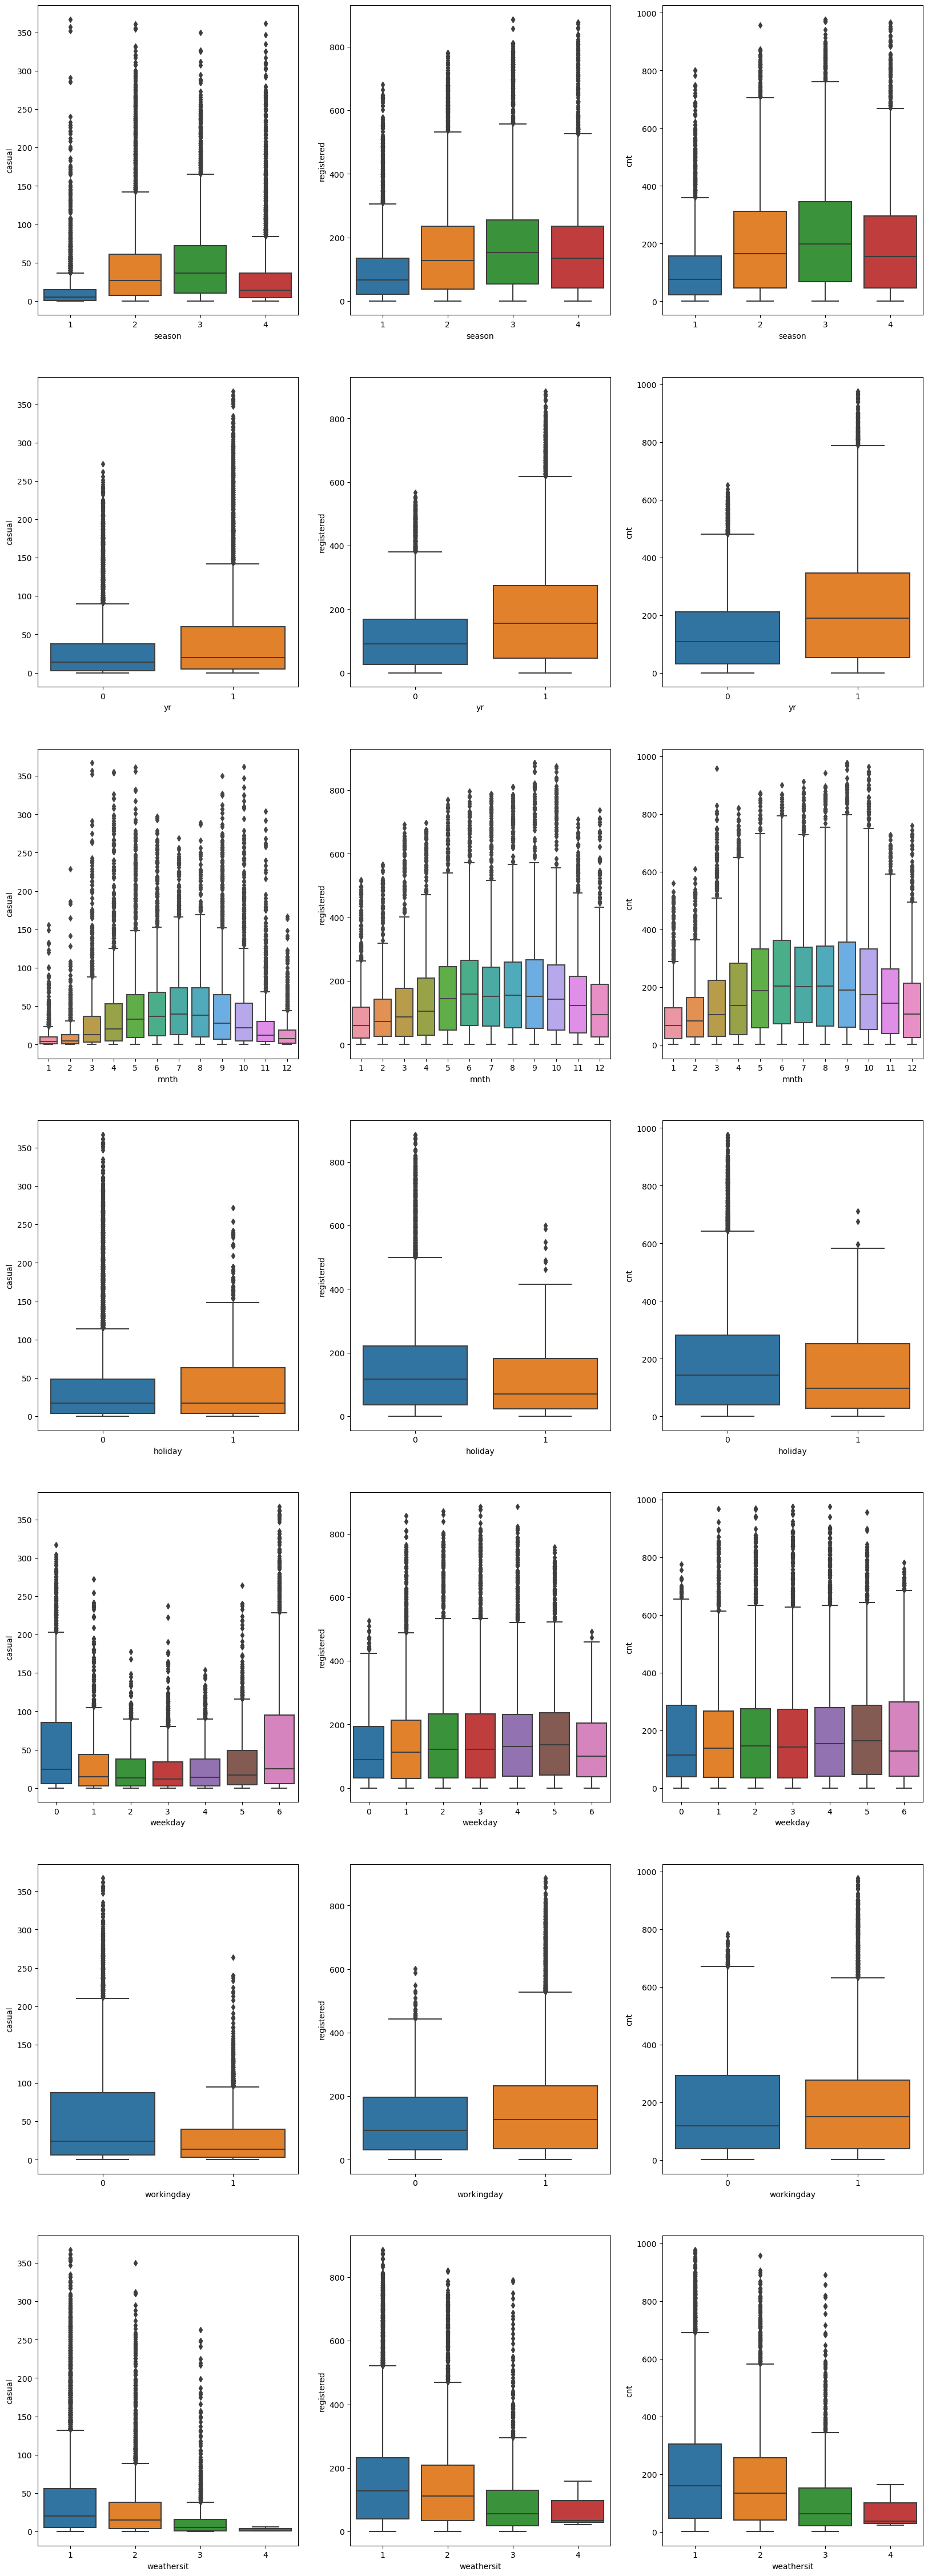

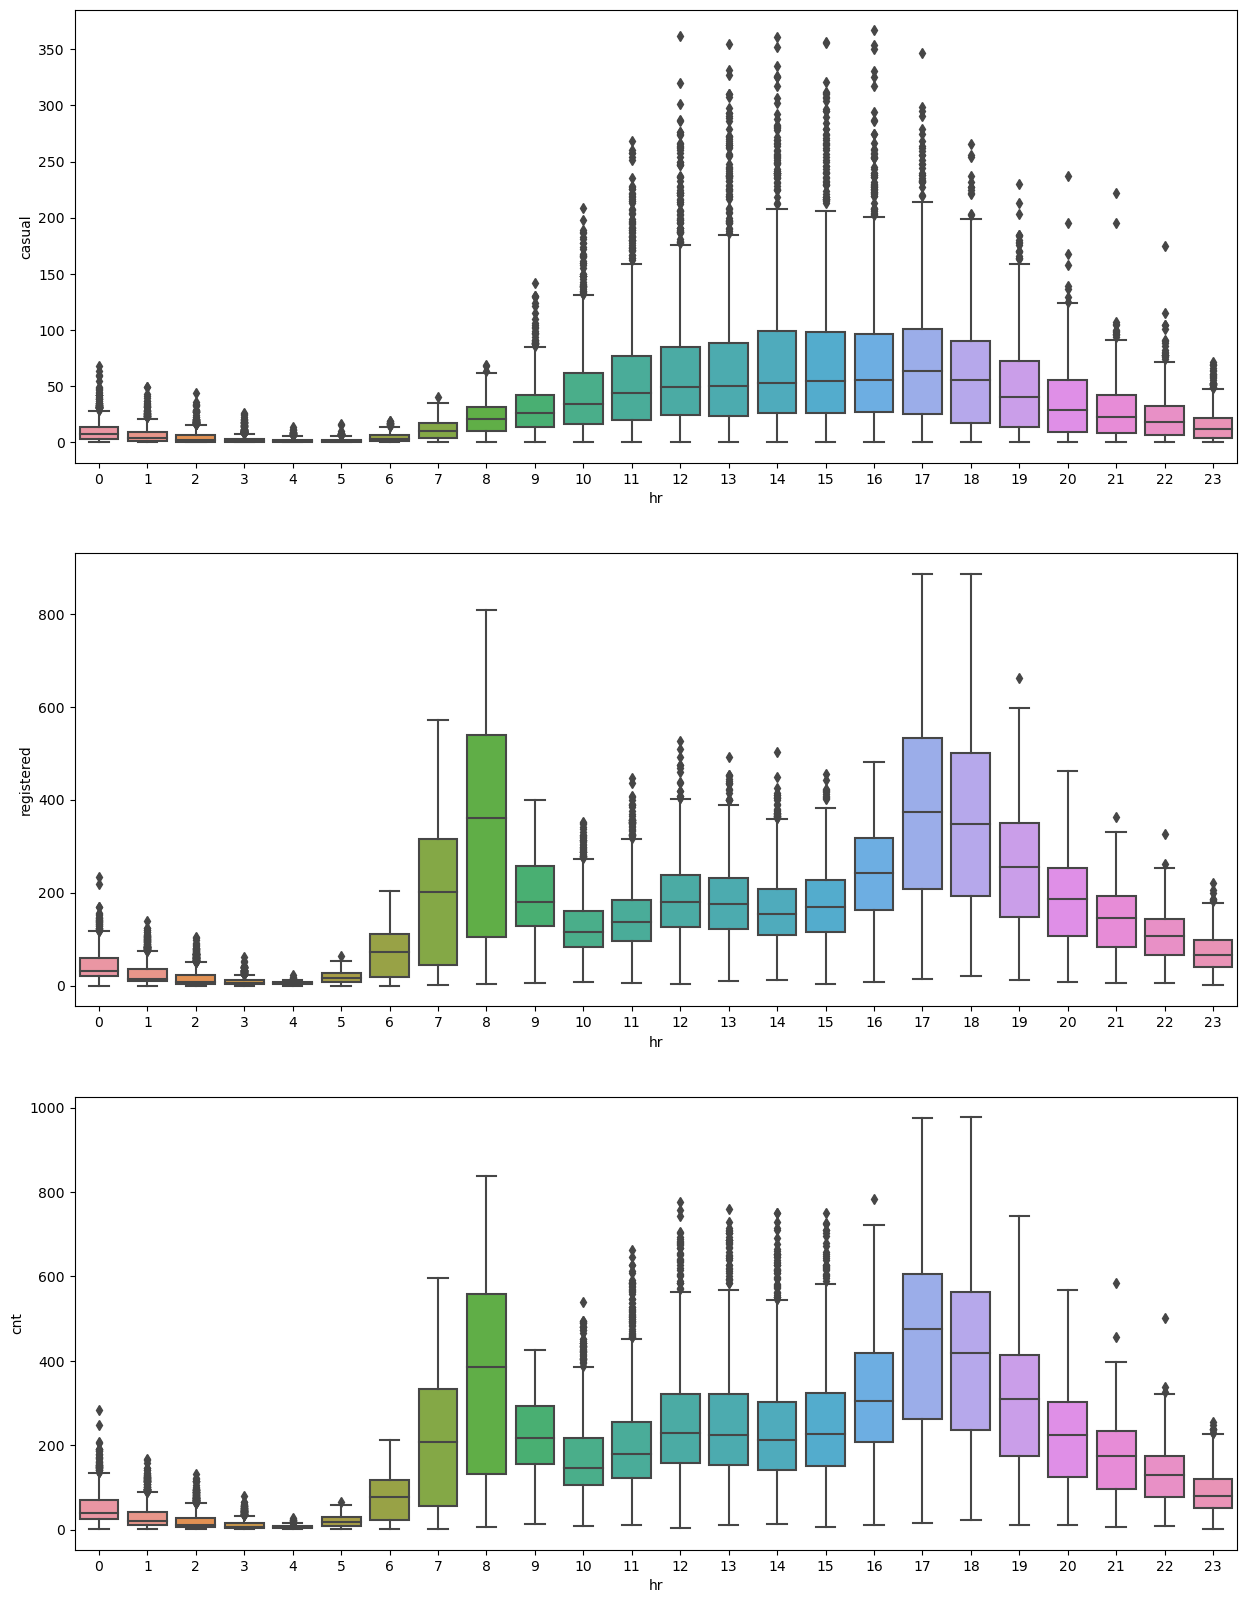

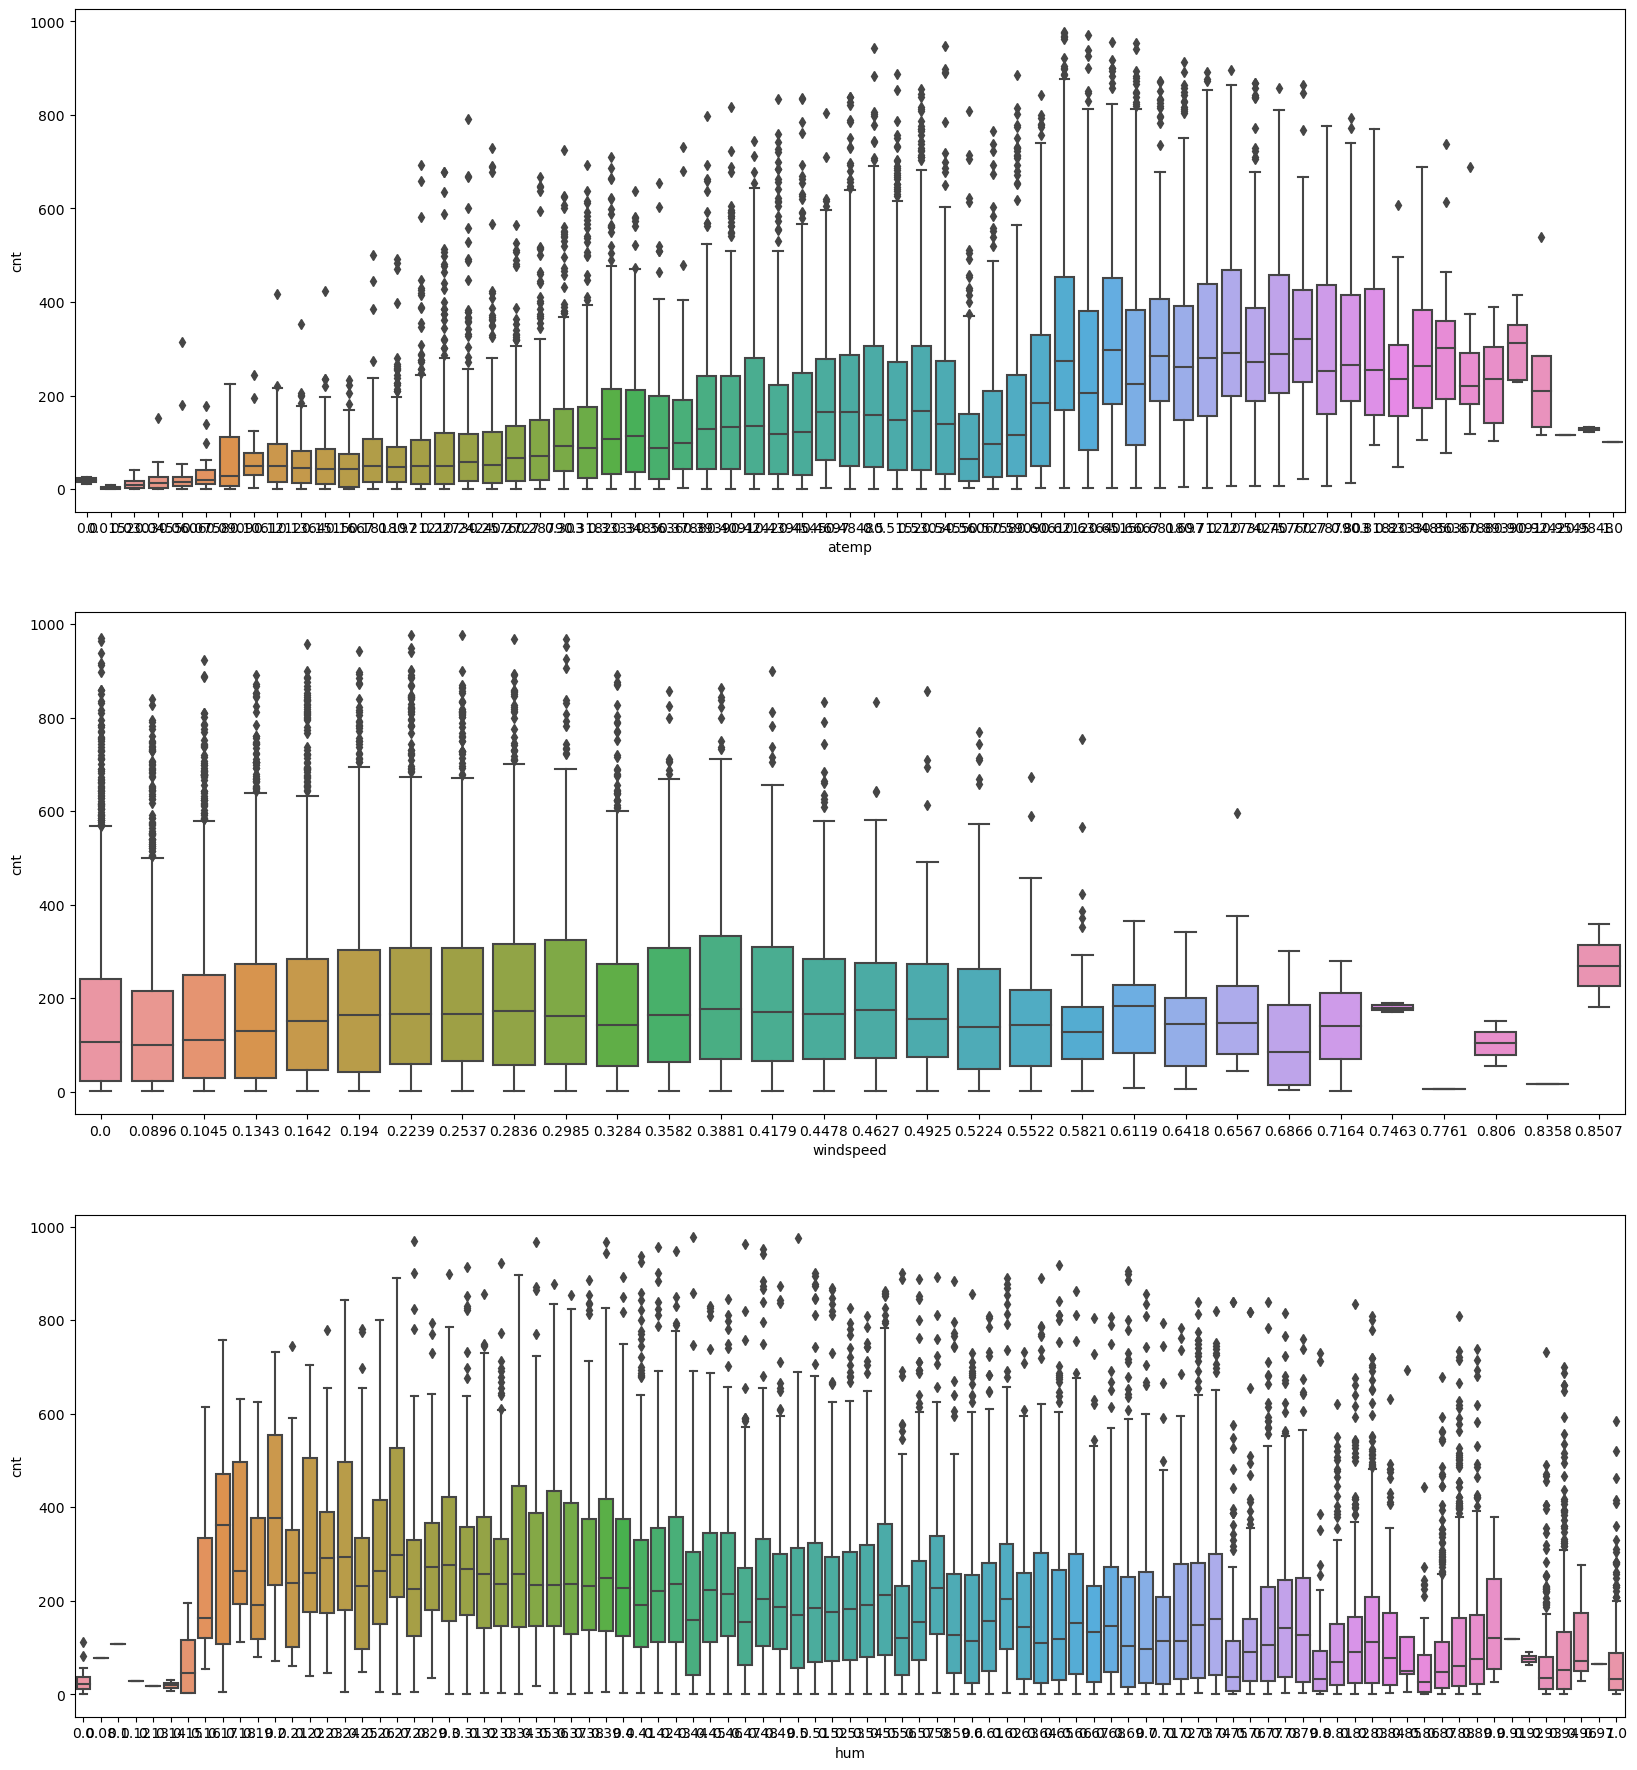

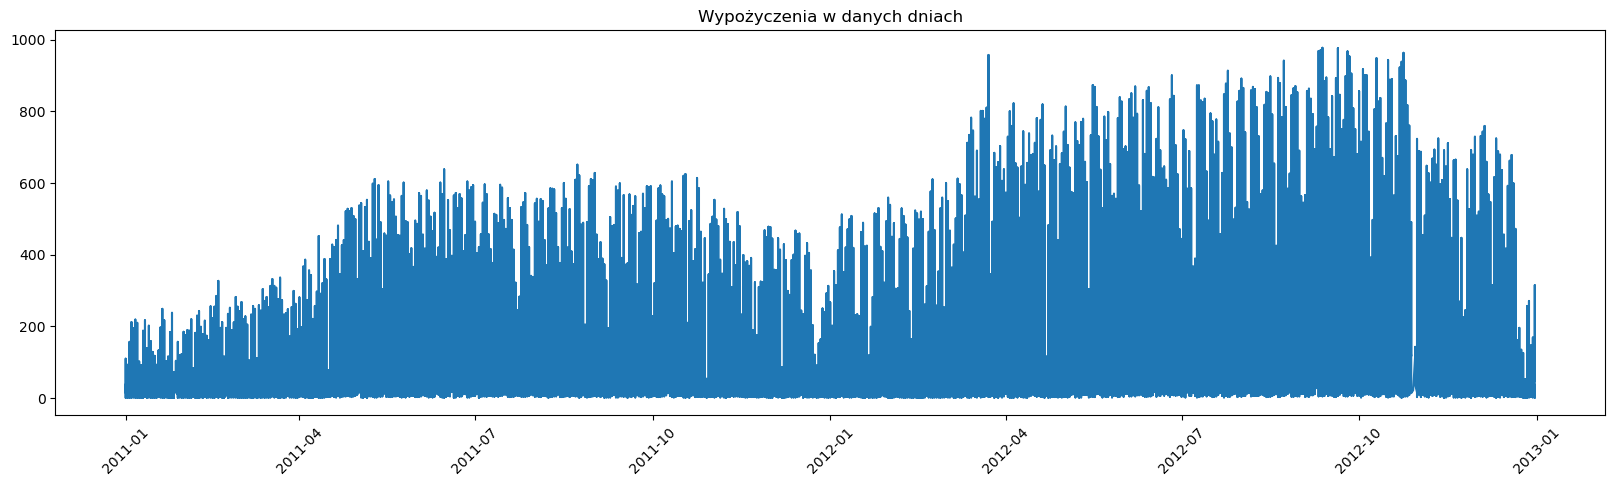

In [257]:
data1=data[['dteday','cnt']]
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(data['dteday'],data['cnt'])
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Wypożyczenia w danych dniach')
plt.show()

Zainteresowanie zwiększyło się w 2 roku oraz widać mocny spadek w okresie zimowym

## Dodatkowe kolumny

In [258]:
data["procent_casual"]=data.apply (lambda row: row.casual/row.cnt, axis=1)
data["procent_registered"]=data.apply (lambda row: row.registered/row.cnt, axis=1)


In [259]:
data["procent_casual"].mean()

0.172142603582102

In [260]:
data["procent_registered"].mean()

0.8278573964178979

Do analizy mogą przydać się prcoentowe wartości użytkowników zarejestrowanych i niezajestrowanych. Zdecydowanie przeważają użytkownicy zarejstorwani.

In [261]:
def wind(row):  
    if row['windspeed'] > 0:
        return 1
    elif row['windspeed'] == 0:
        return 0
    
data["is_wind"]=data.apply(lambda row: wind(row), axis=1)

Ze względu na dominującą wartośc waitru 0 można w wprowadzić zmienną is_wind sprawdzającą czy wieje

In [262]:
cnt = data.pop('cnt')
data.insert(data.shape[1],'cnt',cnt)
data.head()

dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0 2011-01-01       1   0     1   0        0        6           0           1   
1 2011-01-01       1   0     1   1        0        6           0           1   
2 2011-01-01       1   0     1   2        0        6           0           1   
3 2011-01-01       1   0     1   3        0        6           0           1   
4 2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  casual  registered  procent_casual  \
0  0.24  0.2879  0.81        0.0       3          13        0.187500   
1  0.22  0.2727  0.80        0.0       8          32        0.200000   
2  0.22  0.2727  0.80        0.0       5          27        0.156250   
3  0.24  0.2879  0.75        0.0       3          10        0.230769   
4  0.24  0.2879  0.75        0.0       0           1        0.000000   

   procent_registered  is_wind  cnt  
0            0.812500        0   16  
1            0.800000        0   40  
2            0.843750        0   32  
3            0.769231        0   13  
4            1.000000        0    1

## Hipoteza

Na podstawie warunków pogodowych oraz daty można przewidzieć ilość wypożyczonych rowerów